<a href="https://colab.research.google.com/github/sujayrittikar/DeepLearning/blob/master/GridSearchHyperParameterTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, Y_train), (x_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Scaling
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# Reshaping
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

In [ ]:
# One-hot encoding the output variable
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [ ]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(784, )))
  model.add(tf.keras.layers.Dense(128, activation="relu"))
  model.add(tf.keras.layers.Dense(64, activation="relu"))
  model.add(tf.keras.layers.Dense(32, activation="relu"))
  model.add(tf.keras.layers.Dense(10, activation="softmax"))
  model.compile(optimizer="adam", loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])
  return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 20]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, Y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print(grid_result.best_score_, grid_result.best_params_)

0.9735166629155477 {'batch_size': 20, 'epochs': 20}


In [ ]:
model_ = create_model()
fitted = model_.fit(x_train, Y_train, batch_size=20, epochs=20, validation_split=0.25)

In [ ]:
model_.evaluate(x_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1516 - acc: 0.9759


[0.15157553553581238, 0.9758999943733215]

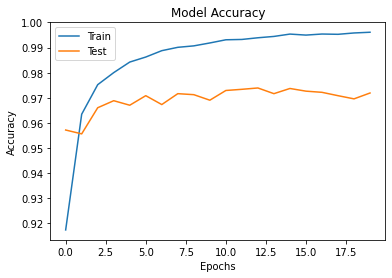

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fitted.history['acc'])
plt.plot(fitted.history['val_acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend(["Train", "Test"])
plt.show()

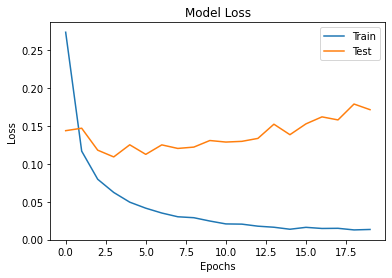

In [ ]:
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend(["Train", "Test"])
plt.show()